In [8]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Utils

In [30]:
def plot_data_frame_histogram (df):
    fig, axes = plt.subplots(8, 2, figsize=(15,30))

    # We will not plot country because it has too many categories.
    for i, c in enumerate(df.columns):
        ax = axes.reshape(-1)[i]
        c_ = c
        if len(c) > 50:
            count = 50
            while count < len(c) and c[count] != " ":
                count += 1
            if count != len(c):
                c_ = (c[:count] + "\n" + c[count:])
        if df[c].dtype.kind == 'O':
            a = sn.countplot(x=c,data=df,ax=ax)
        else:
            b = sn.histplot(x=c,data=df,ax=ax)
        ax.set_title(c_)
    plt.tight_layout()

In [31]:
def generate_matplotlib_histogram(X, labelX, labelY, title, rangeX=None, rangeY=None, bins=30):
  if rangeX is None: 
    rangeX = [np.min(X), np.max(X)]
  plt.hist(X, bins=bins, alpha=1, range=rangeX, density=True, stacked=True)  
  plt.xlabel(labelX)
  plt.ylabel(labelY)
  plt.title(title)
  if rangeY is not None:
    plt.ylim((rangeY[0], rangeY[1]))
  plt.legend([len(x) for x in X] if len(X) > 1 else "X")
  plt.show()

In [32]:
def generate_matplotlib_bar(labels, values, title, ax):
  ax.barh(labels, values)
  ax.set_title(title)

In [33]:
def generate_correlation_y (correlation_matrix, var, title, ax):
    correlation = correlation_matrix.iloc[:, var]
    correlation = correlation.sort_values()
    keys = np.array(correlation.keys())[:var]
    values = np.array(correlation.values)[:var]
    generate_matplotlib_bar(keys, values, title, ax)

# Load Dataset

In [26]:
df = pd.read_csv("datasets/international_matches.csv", delimiter=";")
df.head(5)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,tournament,...,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_score,away_team_score
0,8/8/93,Bolivia,Uruguay,South America,South America,59,22,0,0,FIFA World Cup qualification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
1,8/8/93,Brazil,Mexico,South America,North America,8,14,0,0,Friendly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,8/8/93,Ecuador,Venezuela,South America,South America,35,94,0,0,FIFA World Cup qualification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0
3,8/8/93,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,Friendly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,8/8/93,Paraguay,Argentina,South America,South America,67,5,0,0,FIFA World Cup qualification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3


In [27]:
dfc = df.dropna()
dfc.head(5)
len(dfc)

4303

<AxesSubplot:>

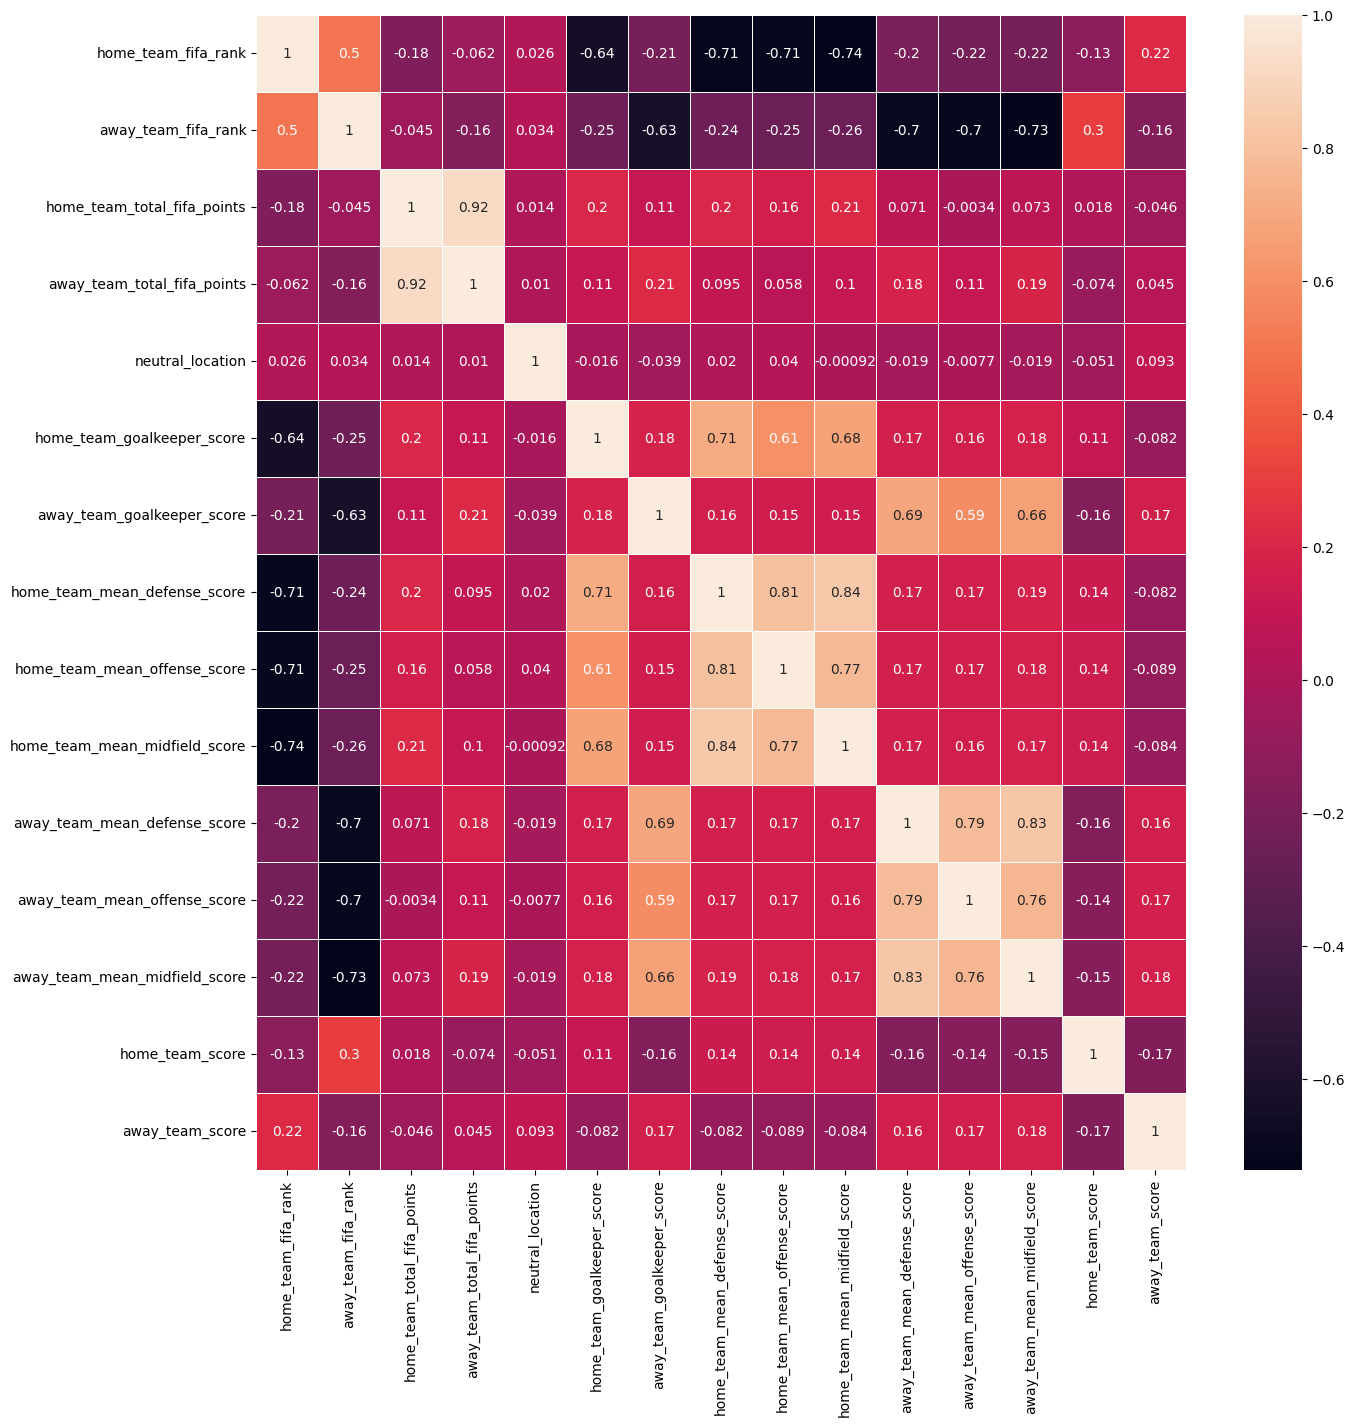

In [28]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)

/var/folders/w3/n781r6t56d58ndtn78dtptwc0000gn/T/ipykernel_1873/1846683796.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


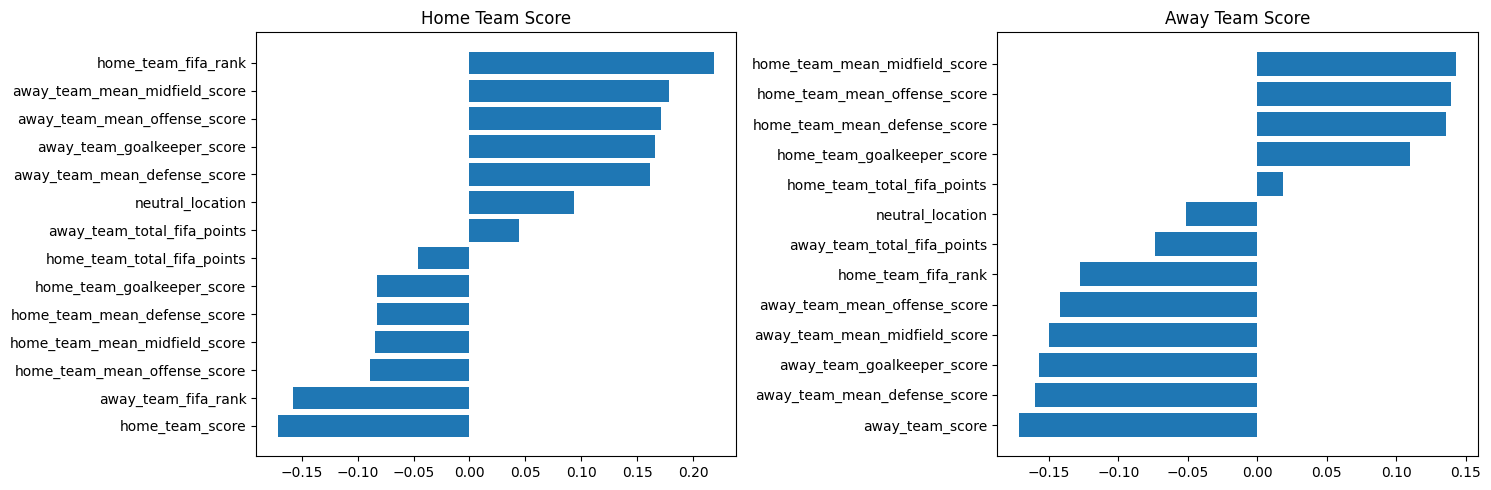

In [34]:
key_objetives = ["Home Team Score", "Away Team Score"]
fig, axes = plt.subplots(1, 2, figsize=(15,5))

for idx, i in enumerate(key_objetives):
  ax = axes.reshape(-1)[idx]
  generate_correlation_y(correlation_matrix, (idx+1) * -1, i, ax)
fig.tight_layout()
fig.show()